In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import mglearn

/home/alex/3rd/py-venv/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/alex/3rd/py-venv/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### 3.5.2 DBSCAN
另一个非常有用的聚类算法是`DBSCAN`(density-based spatial clustering of applications with noise，即`具有噪声的基于密度的空间聚类应用`)。

DBSCAN的主要优点是它不需要用户先验地设置簇的个数，可以划分具有复杂形状的簇，还可以找出不属于任何簇的点。DBSCAN比凝聚聚类和kMeans稍慢，但仍可以扩展到相对较大的数据集。

DBSCAN的原理是识别特征空间的“拥挤”区域中的点，在这些区域中许多数据点靠近在一起。这些区域被称为特征空间中的密集(dense)区域。`DBSCAN`背后的思想是，簇形成数据的密集区域，并由相对较空的区域分隔开。

在密集区域内的点被称为核心样本(core sample，或核心点)，它们的定义如下。DBSCAN有两个参数：`min_samples`和`eps`。如果在距一个给定数据点`eps`的距离内至少有`min_samples`个数据点，那么这个数据点就是核心样本。DBSCAN将彼此距离小于eps的核心样本放到同一个簇中。

算法首先任意选取一个点，然后找到到这个点的距离小于等于`eps`的所有的点。如果距起始点的距离在`eps`之内的数据点个数小于`min_samples`，那么这个点被标记为噪声(noise)，也就是说它不属于任何簇。如果距离在`eps`之内的数据点个数大于`min_samples`，则这个点被标记为核心样本，并被分配一个新的簇标签。然后访问该点的所有邻居（在距离`eps`以内）。如果它们还没有被分配一个簇，那么就将刚刚创建的新的簇标签分配给它们。如果它们是核心样本，那么就依次访问其邻居，以此类推。簇逐渐增大，直到在簇的`eps`距离内没有更多的核心样本为止。然后选取另一个尚未被访问过的点，并重复相同的过程。

最后，一共有三种类型的点：
- 核心点
- 边界点(boundary point)：即与核心点的距离在`eps`之内的点
- 噪声

如果`DBSCAN`算法在特定数据集上多次运行，那么核心点的聚类始终相同，同样的点也始终被标记为噪声。但边界点可能与不止一个簇的核心样本相邻。因此，边界点所属的簇依赖于数据点的访问顺序。一般来说只有很少的边界点，这种对访问顺序的轻度依赖并不重要。

我们将DBSCAN应用于演示凝聚聚类的模拟数据集。与凝聚聚类类似，DBSCAN也不允许对新的测试数据进行预测，所以我们将使用`fit_predict方法`来执行聚类并返回簇标签。

In [2]:
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


所有数据点都被分配了标签`-1`，这代表噪声。这是`eps`和`min_samples`默认参数设置的结果，对于小型的玩具数据集并没有调节这些参数。`min_samples`和`eps`取不同值时的簇分类如`图3-37`：

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


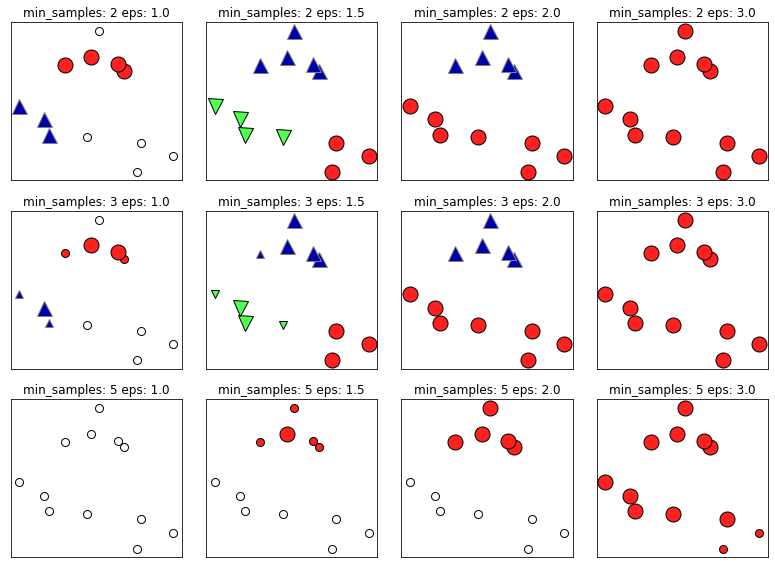

In [3]:
mglearn.plots.plot_dbscan()
plt.show()

属于簇的点是实心的，噪声点显示为空心的。核心样本显示为较大的标记，而边界点则显示为较小的标记。增大`eps`，更多的点会被包含在一个簇中。这让簇变大，但可能也会导致多个簇合并成一个。增大`min_samples`，核心点会变得更少，更多的点被标记为噪声。

参数`eps`在某种程度上更加重要，因为它决定了点与点之间“接近”的含义。将`eps`设置得非常小，意味着没有点是核心样本，可能会导致所有点都被标记为噪声；将`eps`设置得非常大，可能会导致所有点形成单个簇。

设置`min_samples`主要是为了判断稀疏区域内的点被标记为异常值还是形成自己的簇。如果增大`min_samples`，任何一个包含少于`min_samples`个样本的簇现在将被标记为噪声。因此，`min_samples`决定簇的最小尺寸。当$eps=1.5$时，从$min\_samples=3$到$min\_samples=5$，你可以清楚地看到这一点。$min\_samples=3$时有三个簇：分别包含3、4、5个点；$min\_samples=5$时，两个较小的簇(分别包含3个点和4个点)被标记为噪声。

虽然DBSCAN不需要显式地设置簇的个数，但设置`eps`可以隐式地控制找到的簇的个数。使用`StandardScaler`或`MinMaxScaler`对数据进行缩放之后，有时会更容易找到`eps`的较好取值，因为使用这些缩放技术将确保所有特征具有相似的范围。

`图3-38`展示了在`two_moons数据集`上运行DBSCAN的结果。利用默认设置，算法找到了两个半圆形并将其分开：

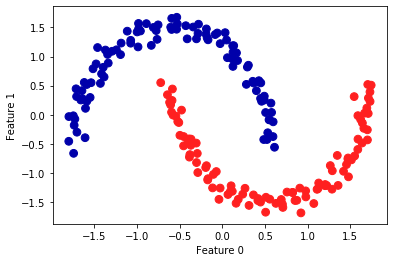

In [4]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 将数据缩放成平均值为0、方差为1
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN(eps=0.5)
clusters = dbscan.fit_predict(X_scaled)
# 绘制簇分配
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

由于算法找到了我们想要的簇的个数，因此参数设置的效果似乎很好。如果将`eps`减小到0.2(默认值为0.5)，我们将会得到8个簇；将`eps`增大到0.7则会导致只有一个簇。

**??在使用DBSCAN时，你需要谨慎处理返回的簇分配。如果使用簇标签对另一个数据进行索引，那么使用-1表示噪声可能会产生意料之外的结果。**